# Type D Models Expect only Proven Variables

In [1]:
import sklearn
import pandas
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pandas.read_csv("../Dataset/final.csv")
data.head()


t                        filter_str  \
0  1.712243e+09  {'user': '{}', 'password': '{}'}   
1  1.712243e+09  {'user': '{}', 'password': '{}'}   
2  1.712243e+09   {'username': {'$regex': '^{}'}}   
3  1.712243e+09   {'username': {'$regex': '^{}'}}   
4  1.712243e+09       {'username': {'$ne': '{}'}}   

                                docUUID                       denamed  \
0  e5e23d7e-5367-4829-a104-ca369c49d4dc  {'name': '{}', 'name': '{}'}   
1  e5e23d7e-5367-4829-a104-ca369c49d4dc  {'name': '{}', 'name': '{}'}   
2  e5e23d7e-5367-4829-a104-ca369c49d4dc   {'name': {'$regex': '^{}'}}   
3  e5e23d7e-5367-4829-a104-ca369c49d4dc   {'name': {'$regex': '^{}'}}   
4  e5e23d7e-5367-4829-a104-ca369c49d4dc       {'name': {'$ne': '{}'}}   

  FindCollectionTarget FindCollectionTargetdeNamed  queryLength      ipHash  \
0      test_collection             test_collection           32  2130706433   
1      test_collection             test_collection           32  2130706433   
2      test_collection             test_collection           31  2130706433   
3      test_collection             test_collection           31  2130706433   
4      test_collection             test_collection           27  2130706433   

    port  whereDetected  regexDetected  emptyFilter  nullArgument  \
0  47038              0              0            0             1   
1  47038              0              0            0             1   
2  47038              0              1            0             1   
3  47038              0              1            0             1   
4  47038              0              0            0             1   

   logicOperator             db      denamedDb  nreturned  cpuNanos  label  \
0              0  test_database  test_database        0.0    176371    0.0   
1              0  test_database  test_database        0.0    176371    0.0   
2              0  test_database  test_database        0.0    112781    1.0   
3              0  test_database  test_database        0.0    112781    1.0   
4              0  test_database  test_database        0.0     71093    1.0   

   planningTimeMicros  
0                83.0  
1                83.0  
2                71.0  
3                71.0  
4                42.0

In [3]:
features = data[data.columns.difference(['label','denamed','filter_str','FindCollectionTarget','FindCollectionTargetdeNamed'])]
target = data['label']
features.head()

cpuNanos             db      denamedDb  \
0    176371  test_database  test_database   
1    176371  test_database  test_database   
2    112781  test_database  test_database   
3    112781  test_database  test_database   
4     71093  test_database  test_database   

                                docUUID  emptyFilter      ipHash  \
0  e5e23d7e-5367-4829-a104-ca369c49d4dc            0  2130706433   
1  e5e23d7e-5367-4829-a104-ca369c49d4dc            0  2130706433   
2  e5e23d7e-5367-4829-a104-ca369c49d4dc            0  2130706433   
3  e5e23d7e-5367-4829-a104-ca369c49d4dc            0  2130706433   
4  e5e23d7e-5367-4829-a104-ca369c49d4dc            0  2130706433   

   logicOperator  nreturned  nullArgument  planningTimeMicros   port  \
0              0        0.0             1                83.0  47038   
1              0        0.0             1                83.0  47038   
2              0        0.0             1                71.0  47038   
3              0        0.0             1                71.0  47038   
4              0        0.0             1                42.0  47038   

   queryLength  regexDetected             t  whereDetected  
0           32              0  1.712243e+09              0  
1           32              0  1.712243e+09              0  
2           31              1  1.712243e+09              0  
3           31              1  1.712243e+09              0  
4           27              0  1.712243e+09              0

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
vectorizer = TfidfVectorizer()

scaler = StandardScaler()
X = data[['emptyFilter','whereDetected','nullArgument','planningTimeMicros']].values
featuresConcat = scaler.fit_transform(X)

In [5]:
from sklearn.model_selection import train_test_split

X_trainS, X_testS, y_trainS, y_testS = train_test_split(featuresConcat, target, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(featuresConcat, target, test_size=0.2)

In [9]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

svm_A_liner = SVC(kernel="linear",verbose=1)
svm_A_poly = SVC(kernel="poly",verbose=1)
svm_A_rbf = SVC(kernel="rbf",verbose=1)
svm_A_sig = SVC(kernel="sigmoid",verbose=1)
log_A = LogisticRegression(verbose=1)
randF_A = RandomForestClassifier(verbose=1)
gbc_A = GradientBoostingClassifier(verbose=1)
knn = KNeighborsClassifier(n_neighbors=7)
dt_clf = DecisionTreeClassifier()
bag_dt = BaggingClassifier()
ada_dt = AdaBoostClassifier()
vote = VotingClassifier
bayes = GaussianNB()

In [10]:
svm_A_liner.fit(X_train,y_train)
svm_A_poly.fit(X_train,y_train)
svm_A_rbf.fit(X_train,y_train)
svm_A_sig.fit(X_train,y_train)
log_A.fit(X_train,y_train)
randF_A.fit(X_train,y_train)
gbc_A.fit(X_train,y_train)
knn.fit(X_train,y_train)
dt_clf.fit(X_train,y_train)
bag_dt.fit(X_train,y_train)
ada_dt.fit(X_train,y_train)
#vote.fit(X_train,y_train)
bayes.fit(X_train,y_train)

[LibSVM]*
optimization finished, #iter = 166
obj = -141.922020, rho = -0.382895
nSV = 146, nBSV = 142
Total nSV = 146
[LibSVM]*
optimization finished, #iter = 147
obj = -147.379998, rho = -0.995777
nSV = 152, nBSV = 146
Total nSV = 152
[LibSVM]*
optimization finished, #iter = 126
obj = -138.262334, rho = 0.441610
nSV = 148, nBSV = 138
Total nSV = 148
[LibSVM]*
optimization finished, #iter = 106
obj = -145.578513, rho = -0.413094
nSV = 149, nBSV = 144
Total nSV = 149
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24073D+02    |proj g|=  2.26003D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final proje

 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


GaussianNB()

Classification Report for Poly SVM:
              precision    recall  f1-score   support

         0.0       0.57      0.88      0.70        26
         1.0       0.40      0.11      0.17        19

    accuracy                           0.56        45
   macro avg       0.49      0.49      0.43        45
weighted avg       0.50      0.56      0.47        45

Classification Report for RBF SVM:
              precision    recall  f1-score   support

         0.0       0.57      0.81      0.67        26
         1.0       0.38      0.16      0.22        19

    accuracy                           0.53        45
   macro avg       0.47      0.48      0.44        45
weighted avg       0.49      0.53      0.48        45

Classification Report for Sigmoid SVM:
              precision    recall  f1-score   support

         0.0       0.56      0.85      0.68        26
         1.0       0.33      0.11      0.16        19

    accuracy                           0.53        45
   macro avg      

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

         0.0       0.62      0.58      0.60        26
         1.0       0.48      0.53      0.50        19

    accuracy                           0.56        45
   macro avg       0.55      0.55      0.55        45
weighted avg       0.56      0.56      0.56        45

Classification Report for KNN:
              precision    recall  f1-score   support

         0.0       0.57      0.50      0.53        26
         1.0       0.41      0.47      0.44        19

    accuracy                           0.49        45
   macro avg       0.49      0.49      0.48        45
weighted avg       0.50      0.49      0.49        45

Classification Report for Decsion Tree:
              precision    recall  f1-score   support

         0.0       0.63      0.65      0.64        26
         1.0       0.50      0.47      0.49        19

    accuracy                           0.58        45
   macro avg

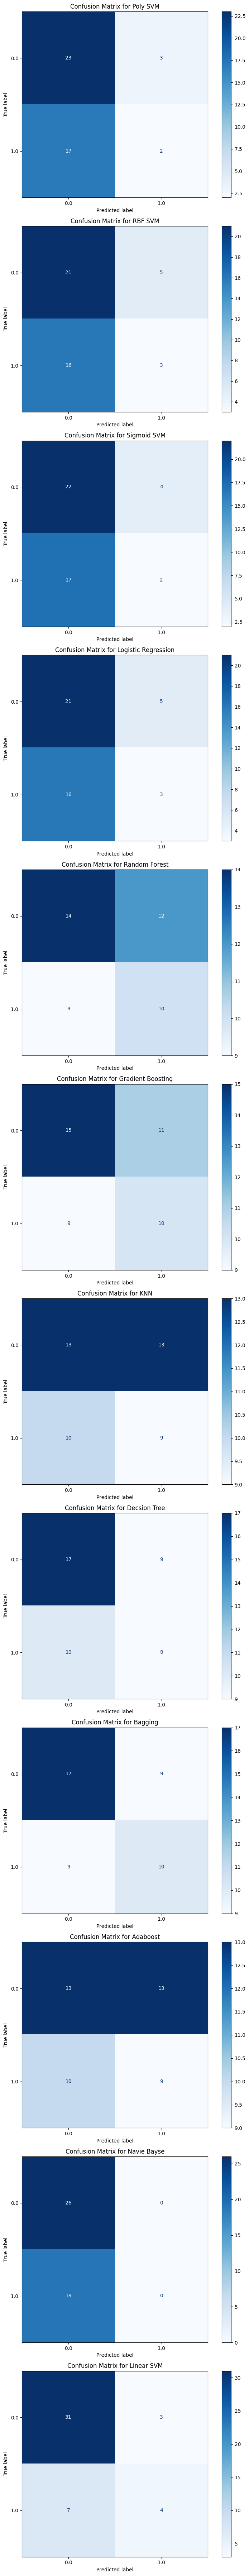

                  Model  Accuracy  Precision    Recall        F1
0              Poly SVM  0.555556   0.400000  0.105263  0.166667
1               RBF SVM  0.533333   0.375000  0.157895  0.222222
2           Sigmoid SVM  0.533333   0.333333  0.105263  0.160000
3   Logistic Regression  0.533333   0.375000  0.157895  0.222222
4         Random Forest  0.533333   0.454545  0.526316  0.487805
5     Gradient Boosting  0.555556   0.476190  0.526316  0.500000
6                   KNN  0.488889   0.409091  0.473684  0.439024
7          Decsion Tree  0.577778   0.500000  0.473684  0.486486
8               Bagging  0.600000   0.526316  0.526316  0.526316
9              Adaboost  0.488889   0.409091  0.473684  0.439024
10          Navie Bayse  0.577778   1.000000  0.000000  0.000000
11           Linear SVM  0.777778   0.571429  0.363636  0.444444


In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from scipy.sparse import csr_matrix
import pandas as pd

# Define the scaled models
modelsScaled = {
    "Linear SVM": svm_A_liner
}

# Define the unscaled models
models = {
    "Poly SVM": svm_A_poly,
    "RBF SVM": svm_A_rbf,
    "Sigmoid SVM": svm_A_sig,
    "Logistic Regression": log_A,
    "Random Forest": randF_A,
    "Gradient Boosting": gbc_A,
    "KNN": knn,
    "Decsion Tree": dt_clf,
    "Bagging": bag_dt,
    "Adaboost": ada_dt,
    "Navie Bayse": bayes
}

bModels = {
    "Navie Bayse": bayes
}

# Function to plot confusion matrix for each model
def plot_confusion_matrix(model, X, y, title):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=ax, cmap=plt.cm.Blues)
    ax.set_title(title)

# Function to print classification report and collect metrics
def print_classification_report_and_collect_metrics(model, X, y, name):
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    ps = precision_score(y, y_pred, zero_division=1)
    recall = recall_score(y, y_pred, zero_division=1)
    f1 = f1_score(y, y_pred, zero_division=1)
    report = classification_report(y, y_pred, zero_division=1)
    print(f"Classification Report for {name}:")
    print(report)
    metrics_list.append({'Model': name, 'Accuracy': acc, 'Precision': ps, 'Recall': recall, 'F1': f1})

# Create subplots
metrics_list = []
fig, axs = plt.subplots(nrows=len(modelsScaled) + len(models), ncols=1, figsize=(8, 6*(len(modelsScaled) + len(models))), subplot_kw={'aspect': 'equal'})

# Plot confusion matrices and print classification report for unscaled models
for idx, (name, model) in enumerate(models.items()):
    ax = axs[idx]
    plot_confusion_matrix(model, X_test, y_test, f"Confusion Matrix for {name}")
    print_classification_report_and_collect_metrics(model, X_test, y_test, name)

# Plot confusion matrices and print classification report for scaled models
for idx, (name, model) in enumerate(modelsScaled.items()):
    ax = axs[idx + len(models)]  # Adjusting the index for scaled models
    plot_confusion_matrix(model, X_testS, y_testS, f"Confusion Matrix for {name}")
    print_classification_report_and_collect_metrics(model, X_testS, y_testS, name)

# Adjust layout to evenly space out subplots
plt.tight_layout(h_pad=1.0)

# Show the plot
plt.show()

# Create a metrics table
metrics_df = pd.DataFrame(metrics_list)
print(metrics_df)

# Save the metrics table to a file
metrics_df.to_csv('model_metricsC.csv', index=False)

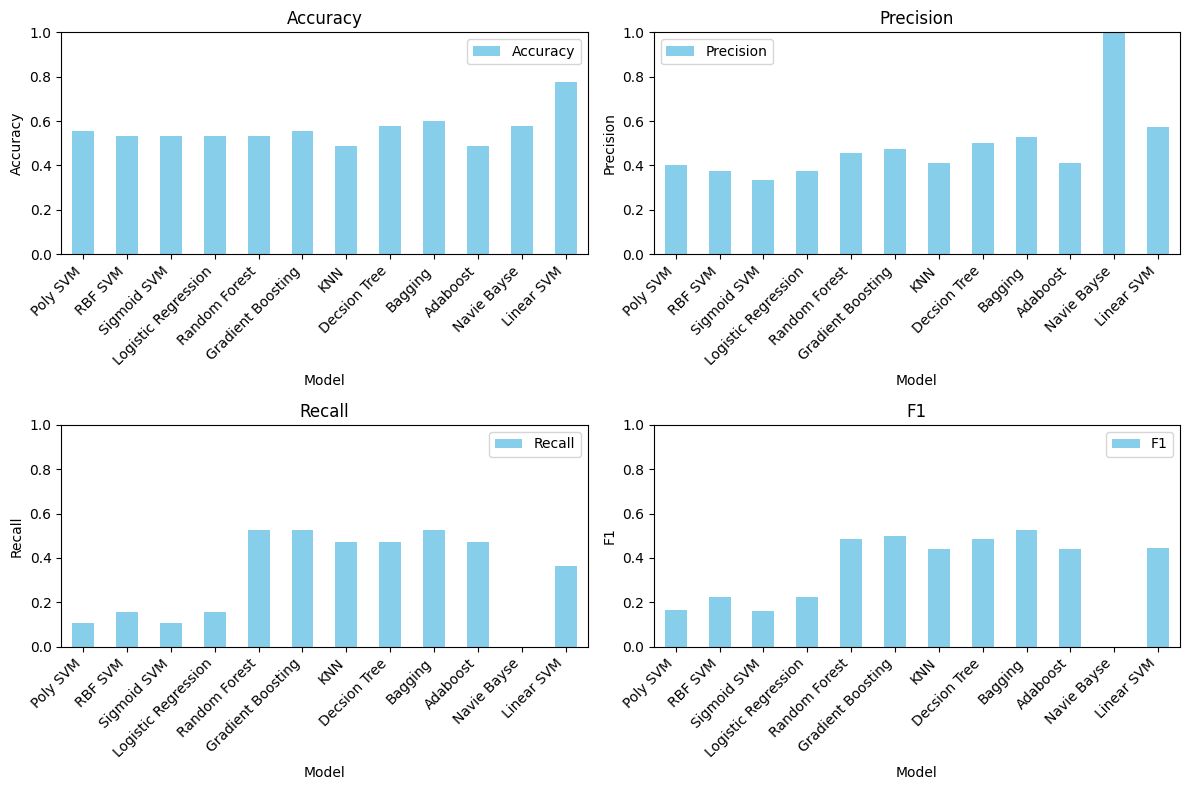

In [12]:
metrics_df = pandas.DataFrame(metrics_list)

# Plot bar charts for each metric
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1']
for i, metric in enumerate(metrics_to_plot):
    ax = axes[i // 2, i % 2]
    metrics_df.plot(kind='bar', x='Model', y=metric, ax=ax, color='skyblue')
    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.set_xlabel('Model')
    ax.set_xticklabels(metrics_df['Model'], rotation=45, ha='right')
    ax.set_ylim(0, 1)
    
    max_value = 1
    for p in ax.patches:
        percentage = p.get_height() / max_value * 100

plt.tight_layout()
plt.show()

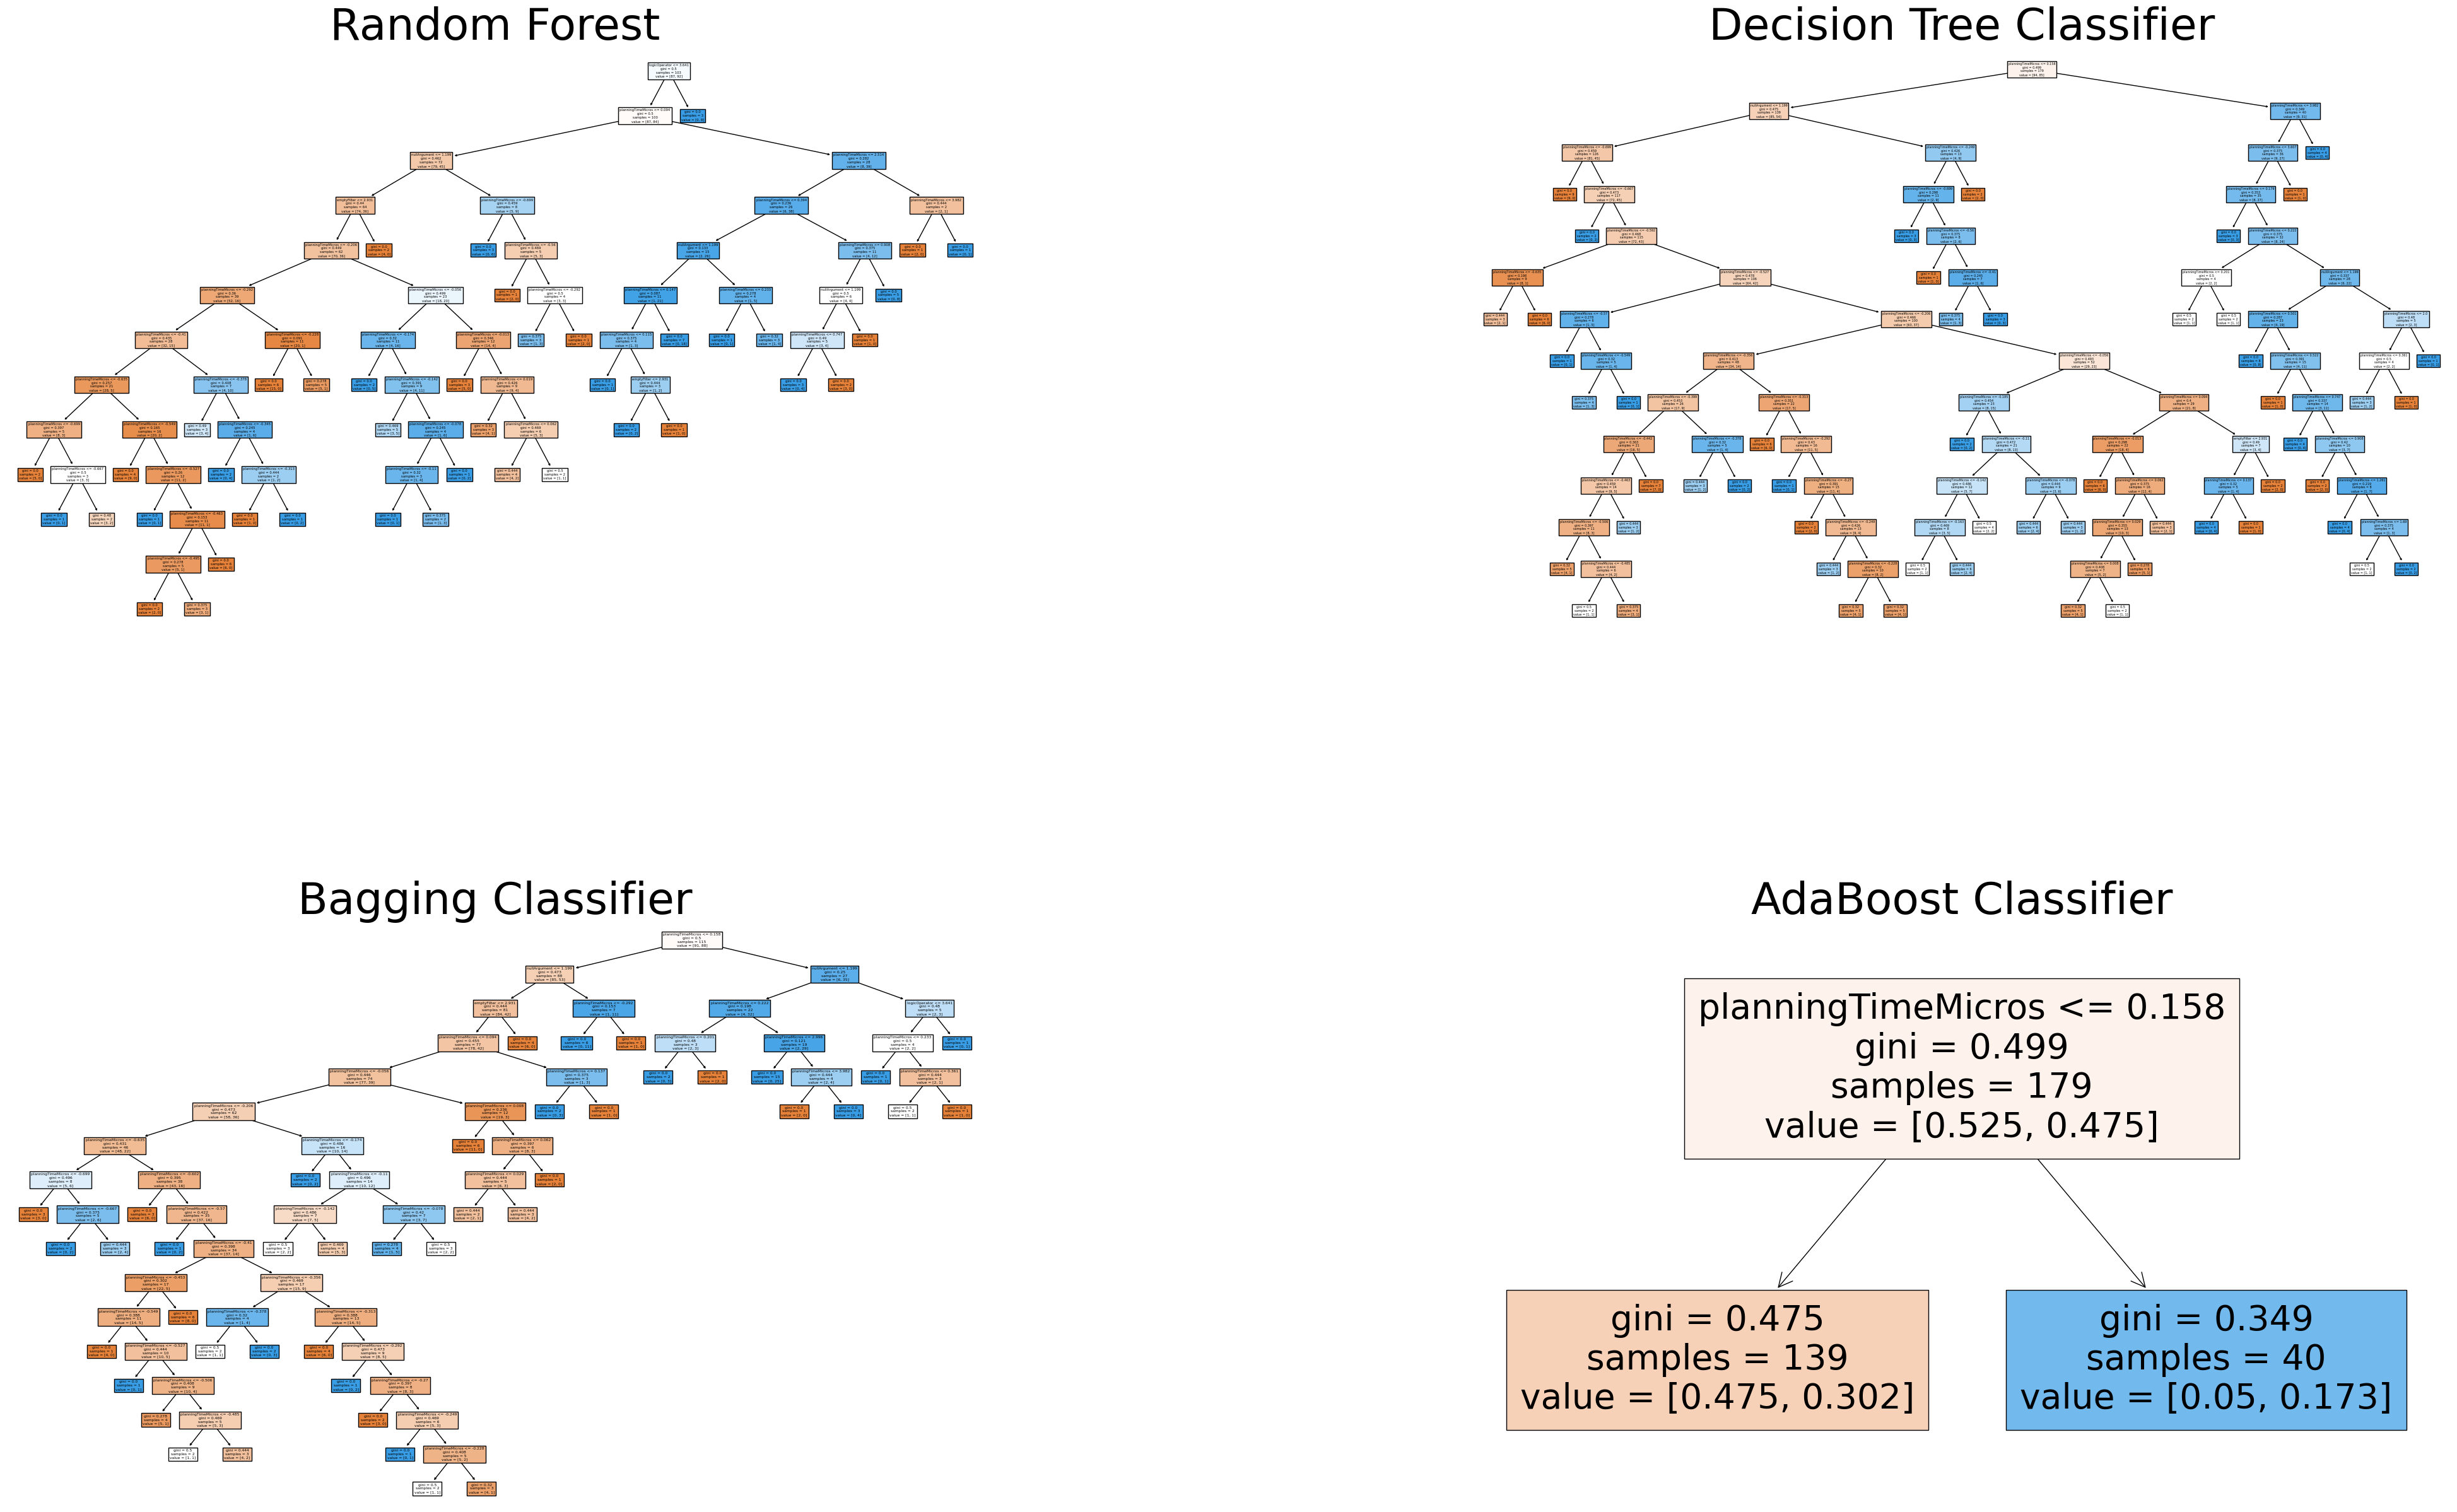

In [14]:

combined_feature_names = ['emptyFilter','whereDetected','nullArgument','logicOperator','planningTimeMicros']
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(50, 30))

# Plot the first decision tree
plot_tree(randF_A.estimators_[0], ax=axes[0, 0], filled=True, feature_names=combined_feature_names)
axes[0, 0].set_title('Random Forest', fontsize=50)

# Plot the second decision tree
plot_tree(dt_clf, ax=axes[0, 1], filled=True, feature_names=combined_feature_names)
axes[0, 1].set_title('Decision Tree Classifier', fontsize=50)

# Plot the third decision tree
plot_tree(bag_dt.estimators_[0], ax=axes[1, 0], filled=True, feature_names=combined_feature_names)
axes[1, 0].set_title('Bagging Classifier', fontsize=50)

# Plot the fourth decision tree
plot_tree(ada_dt.estimators_[0], ax=axes[1, 1], filled=True, feature_names=combined_feature_names)
axes[1, 1].set_title('AdaBoost Classifier', fontsize=50)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Display the figure
plt.show()

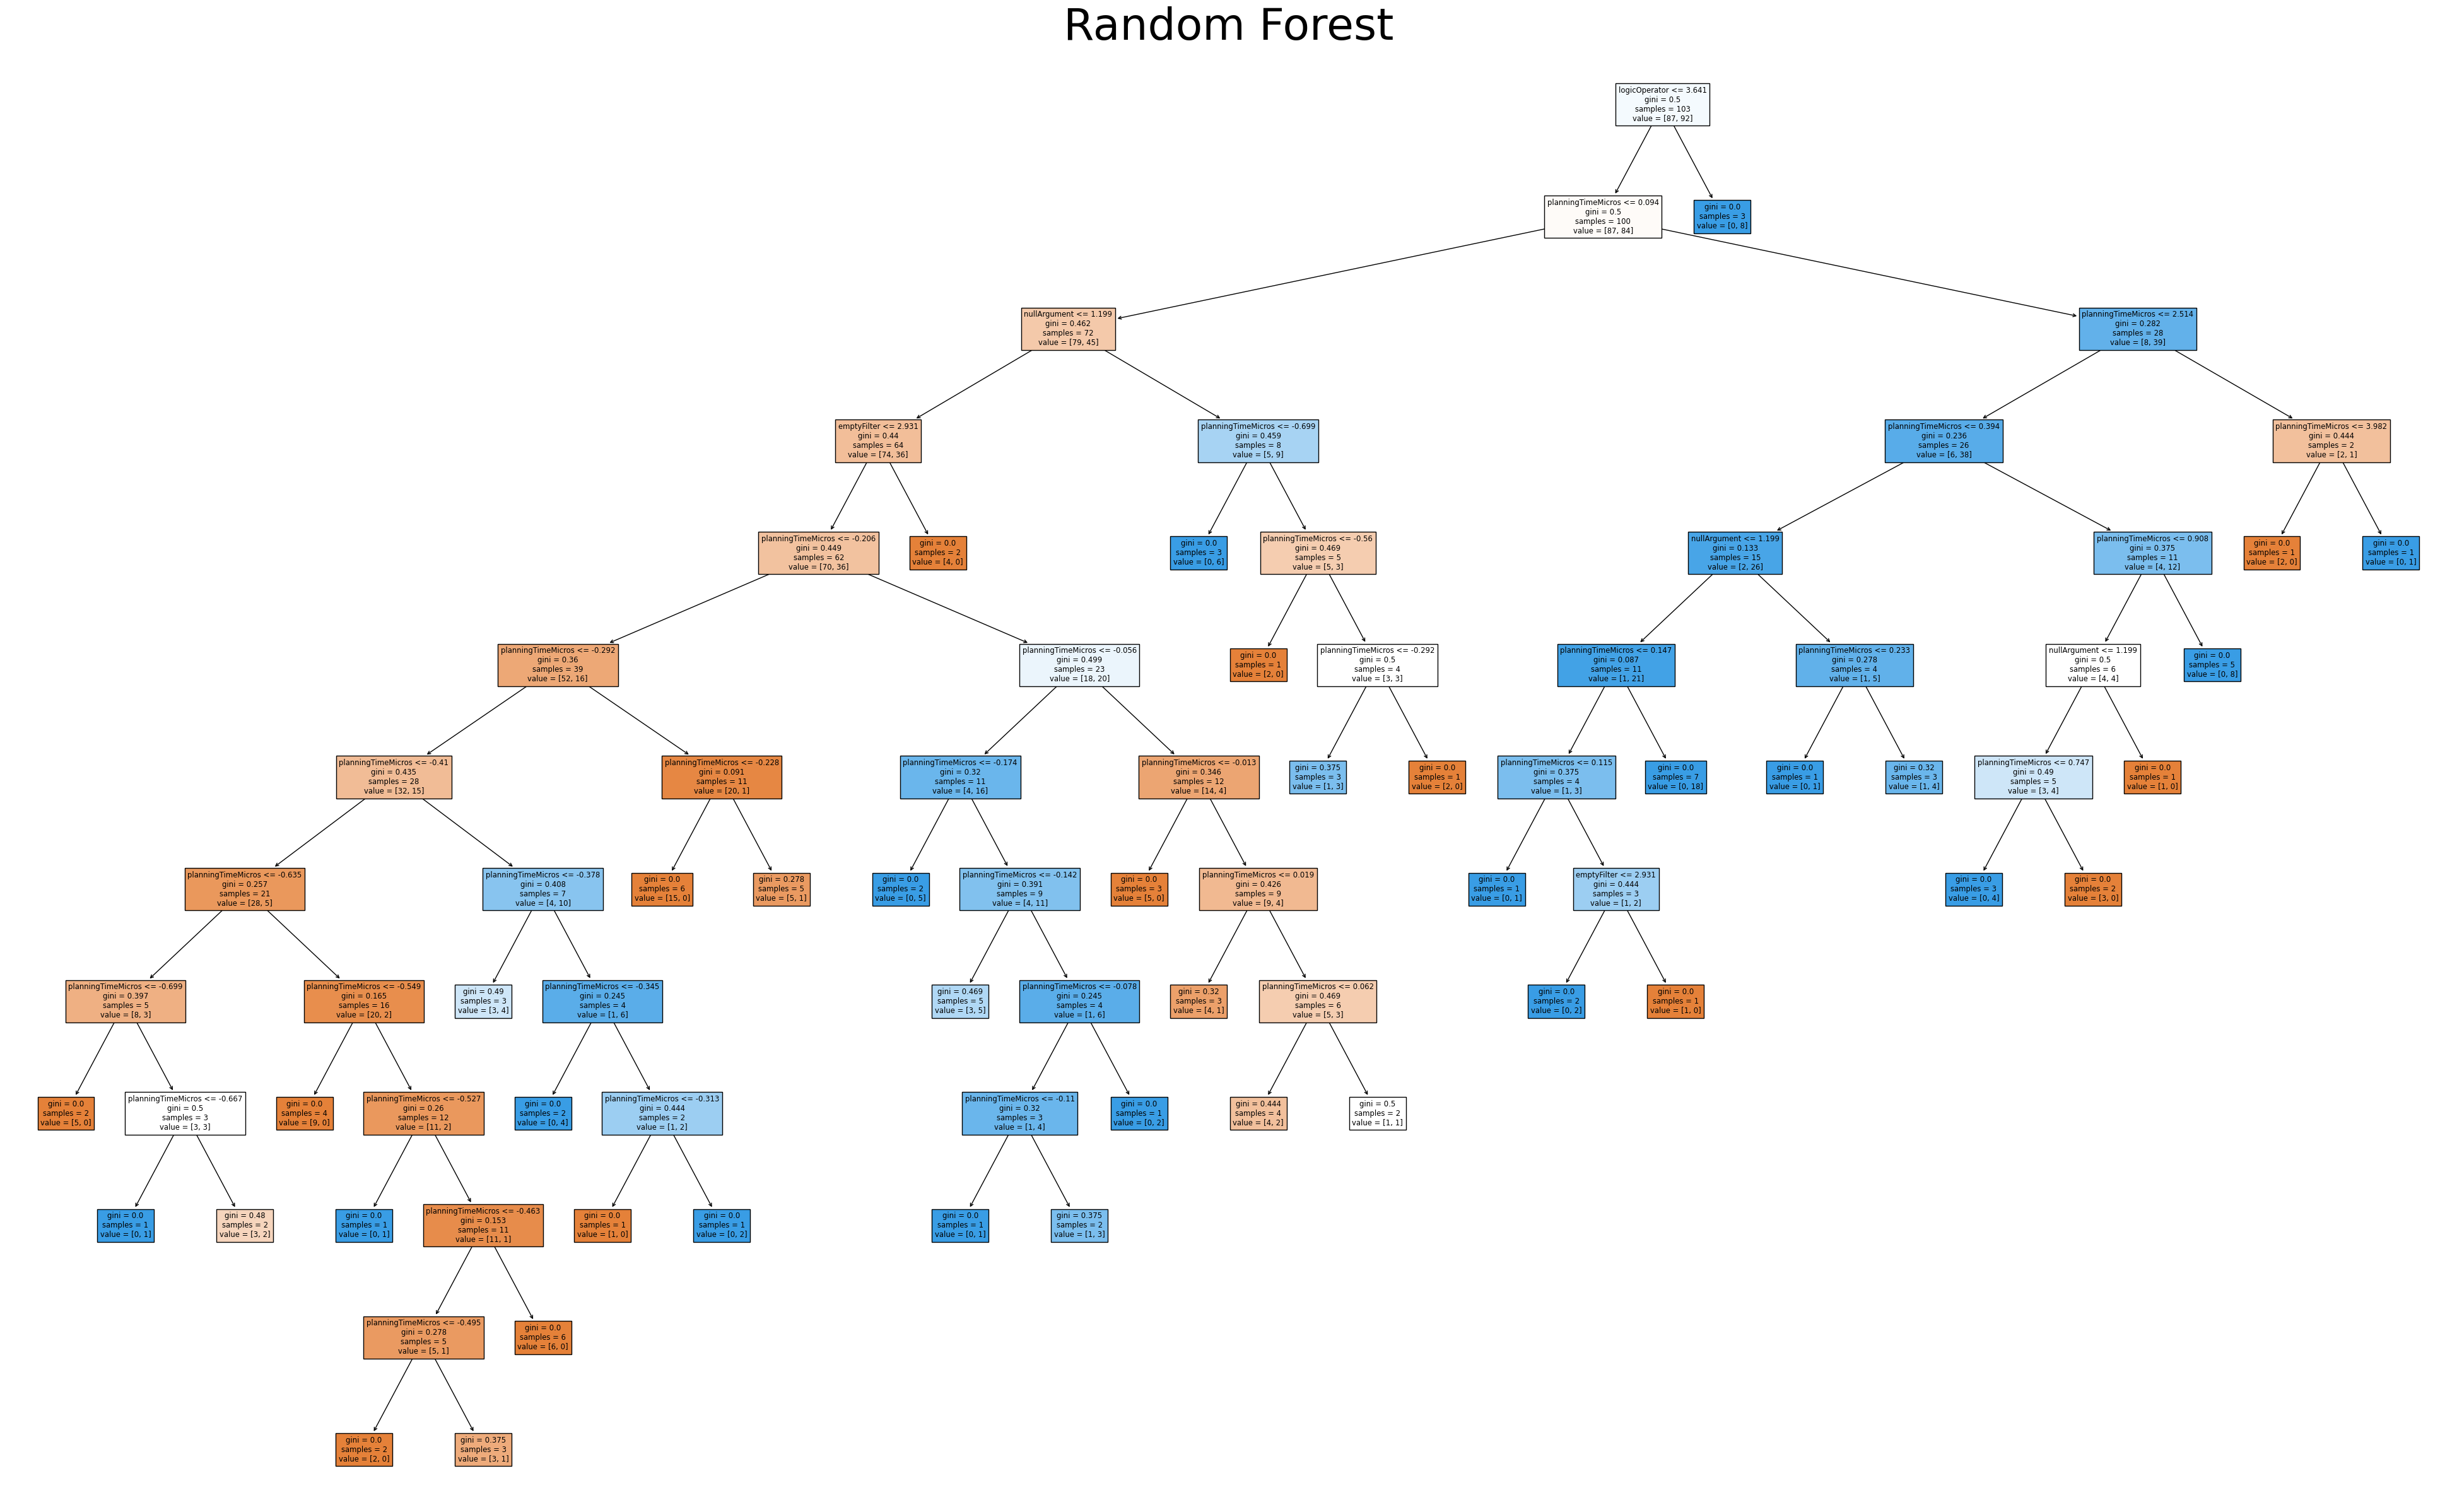

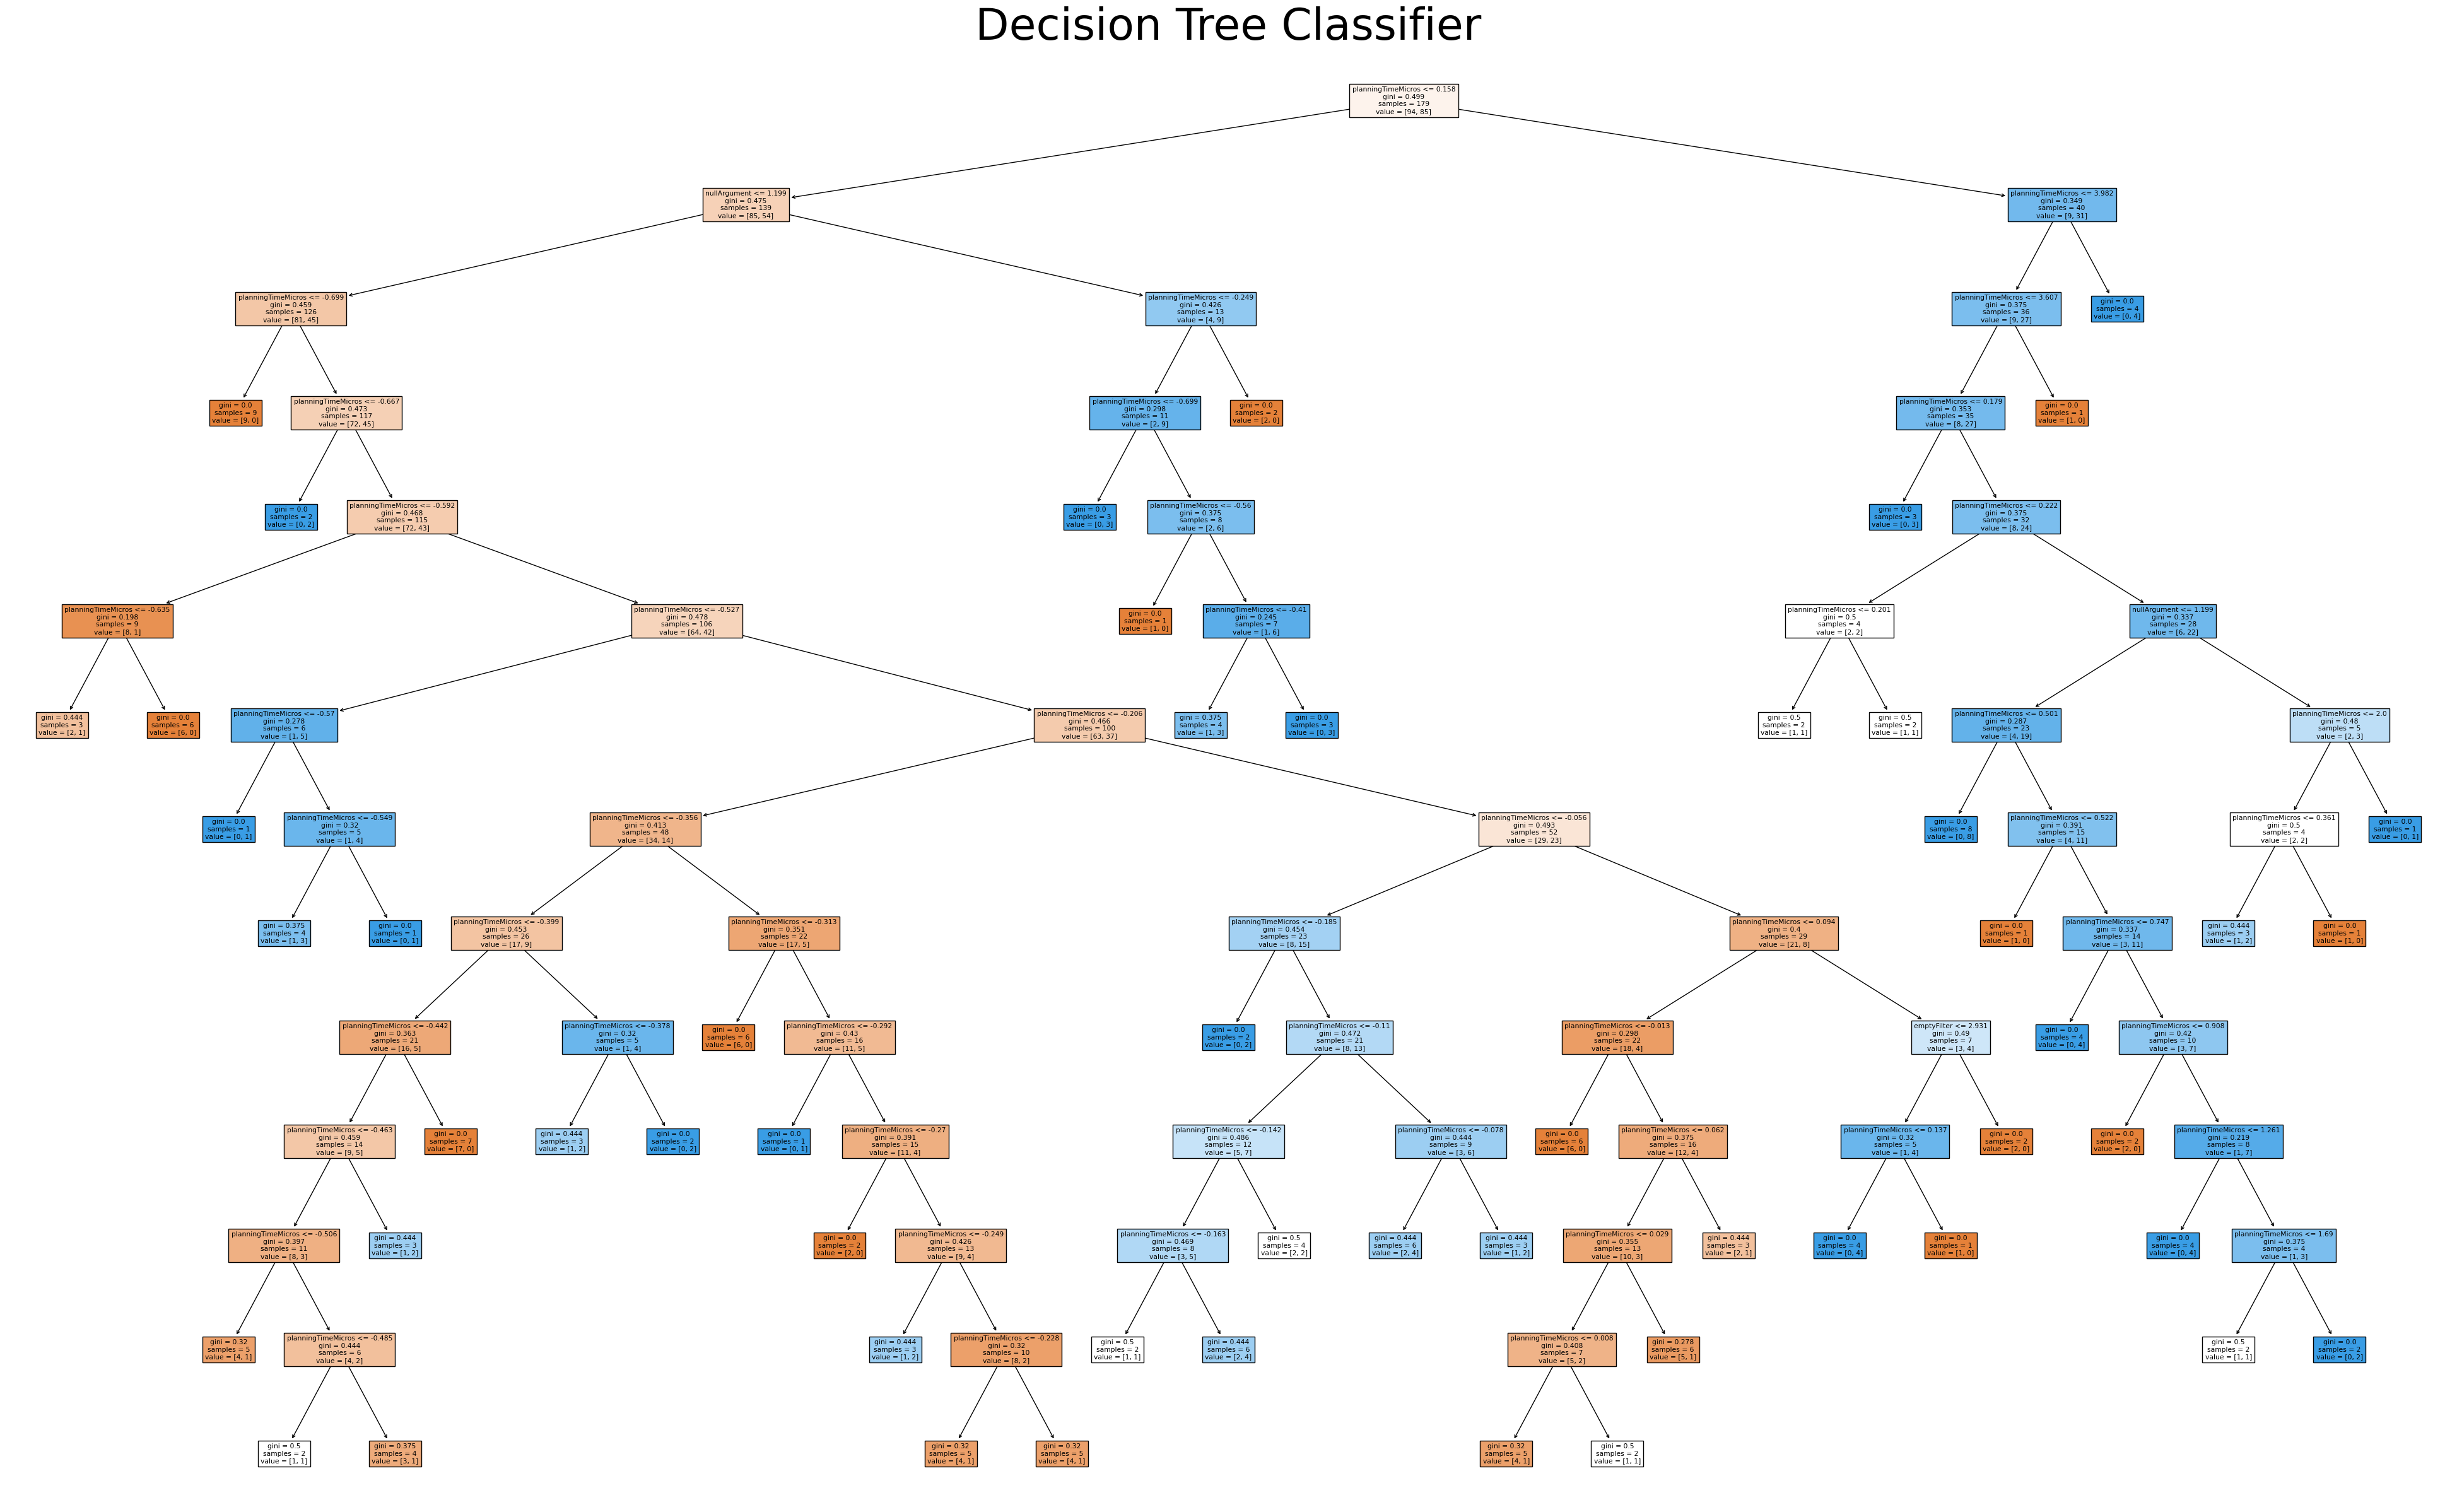

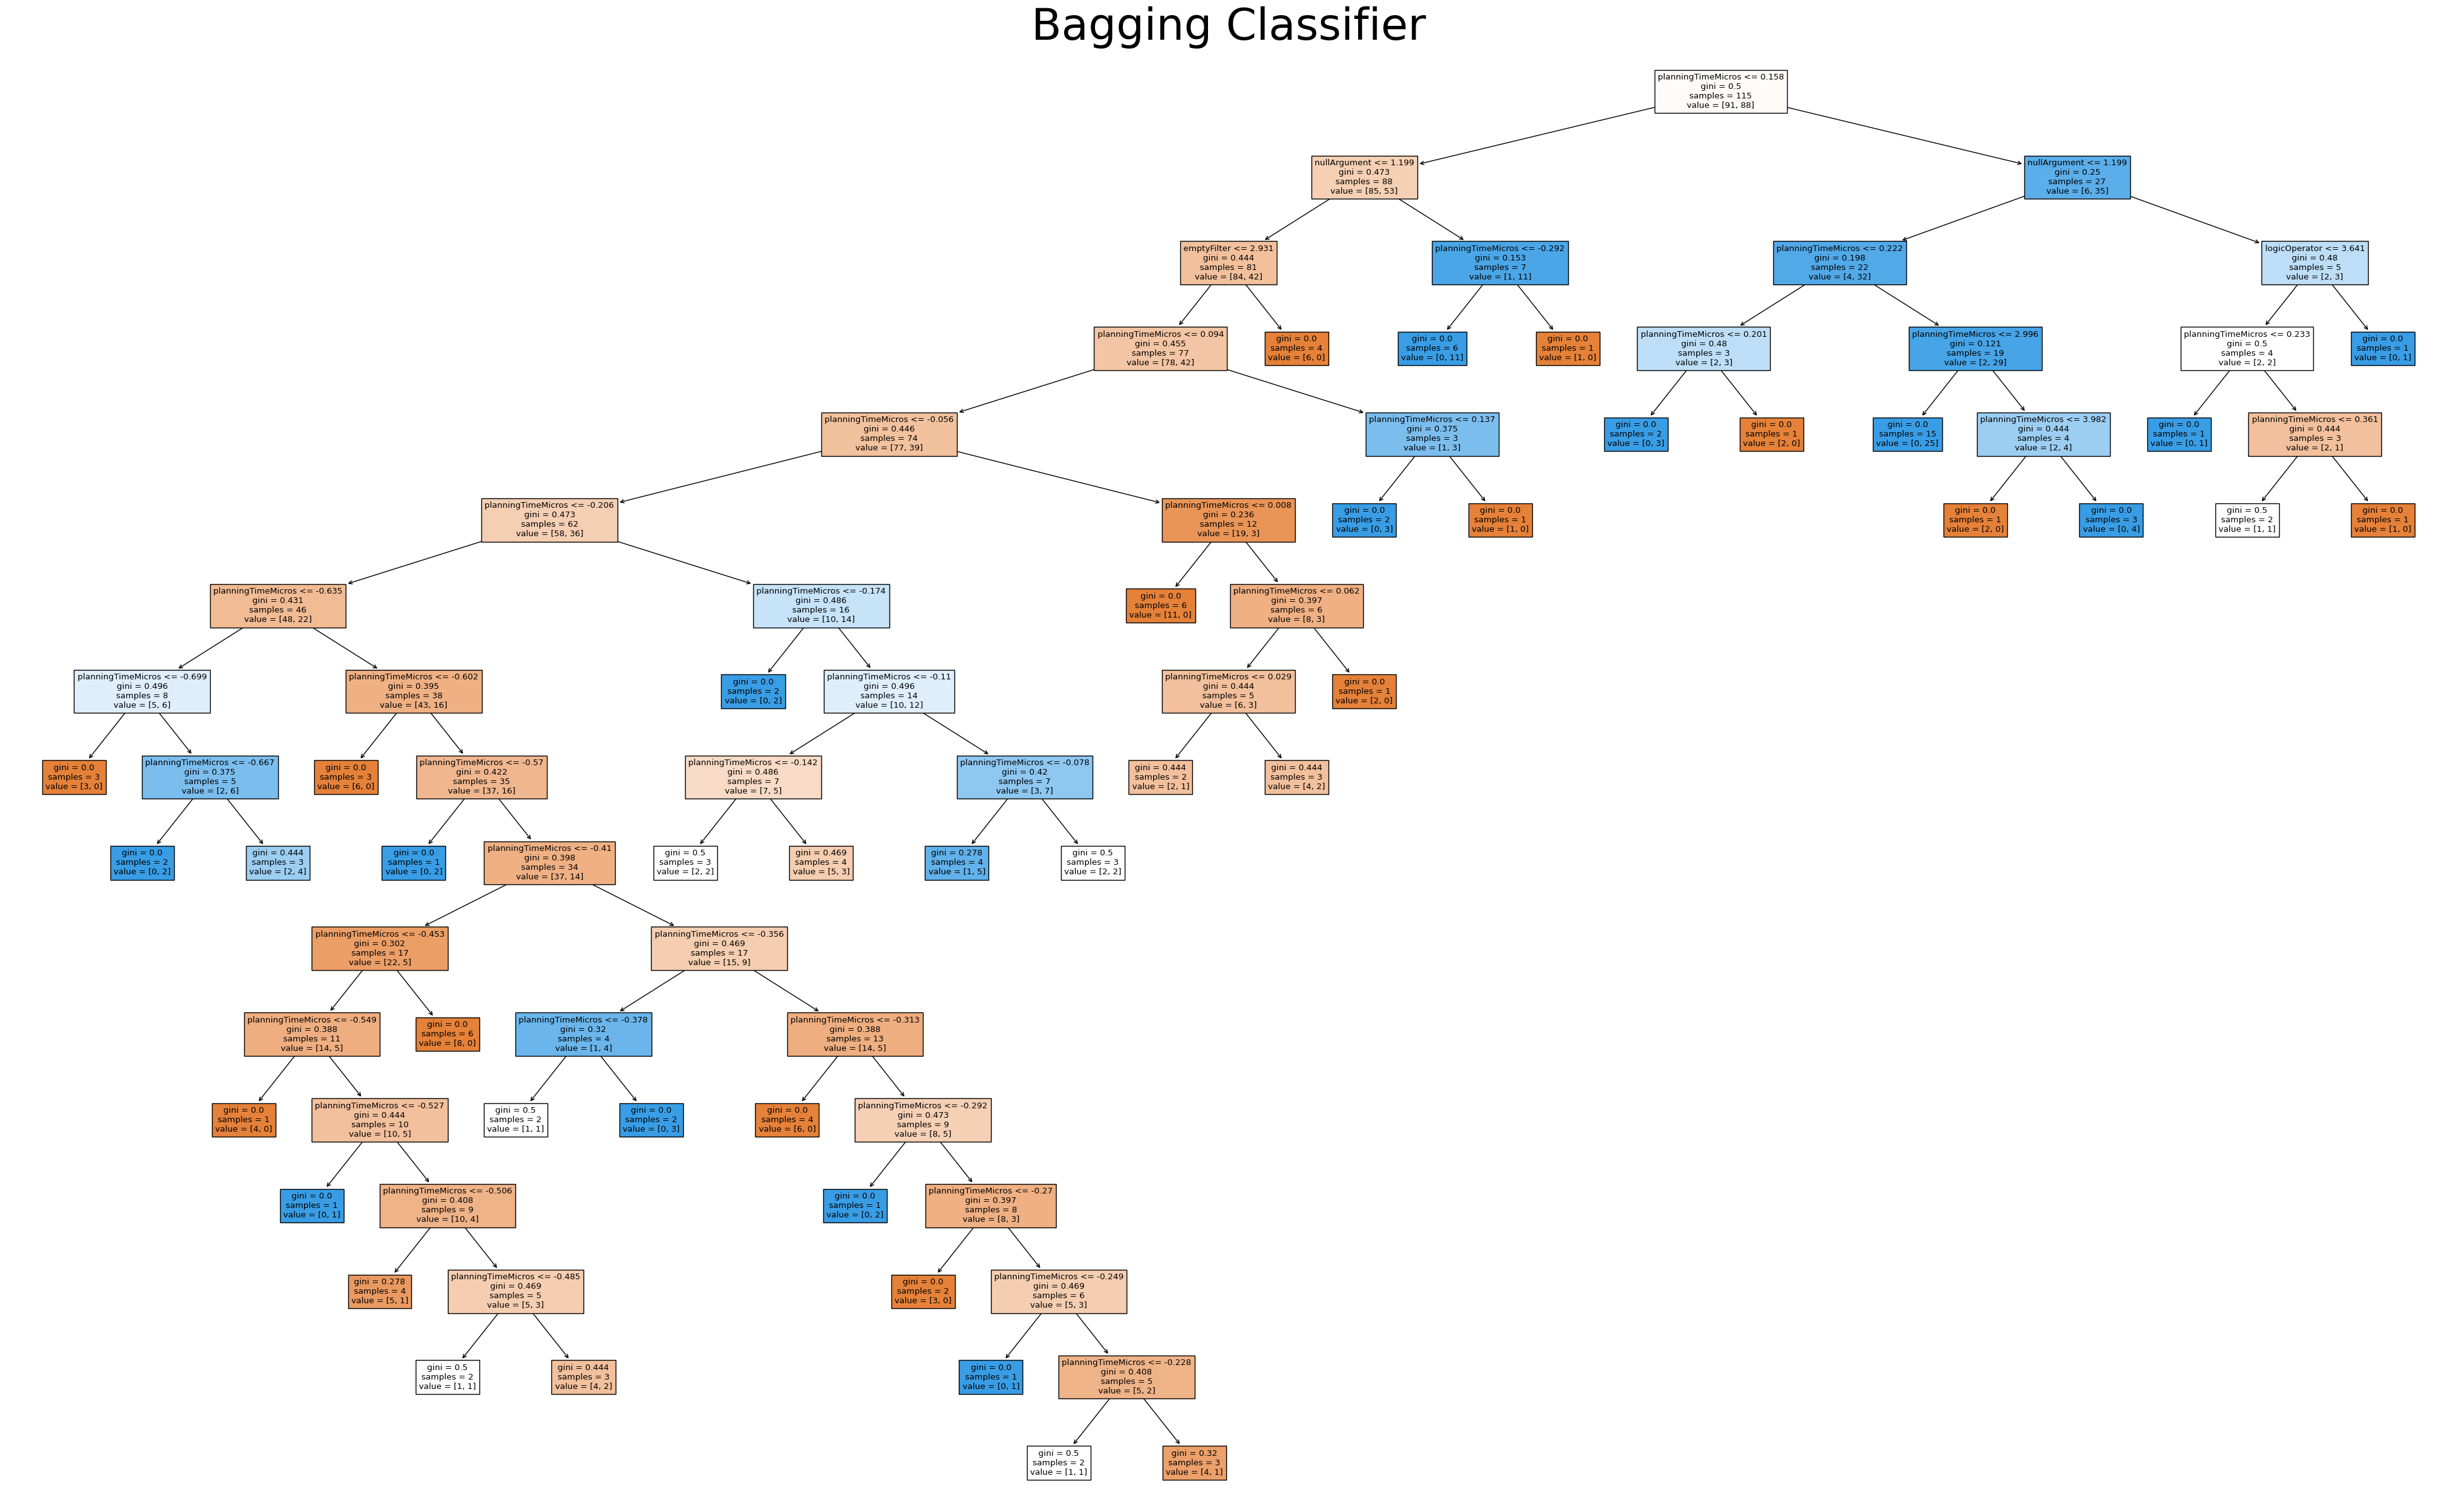

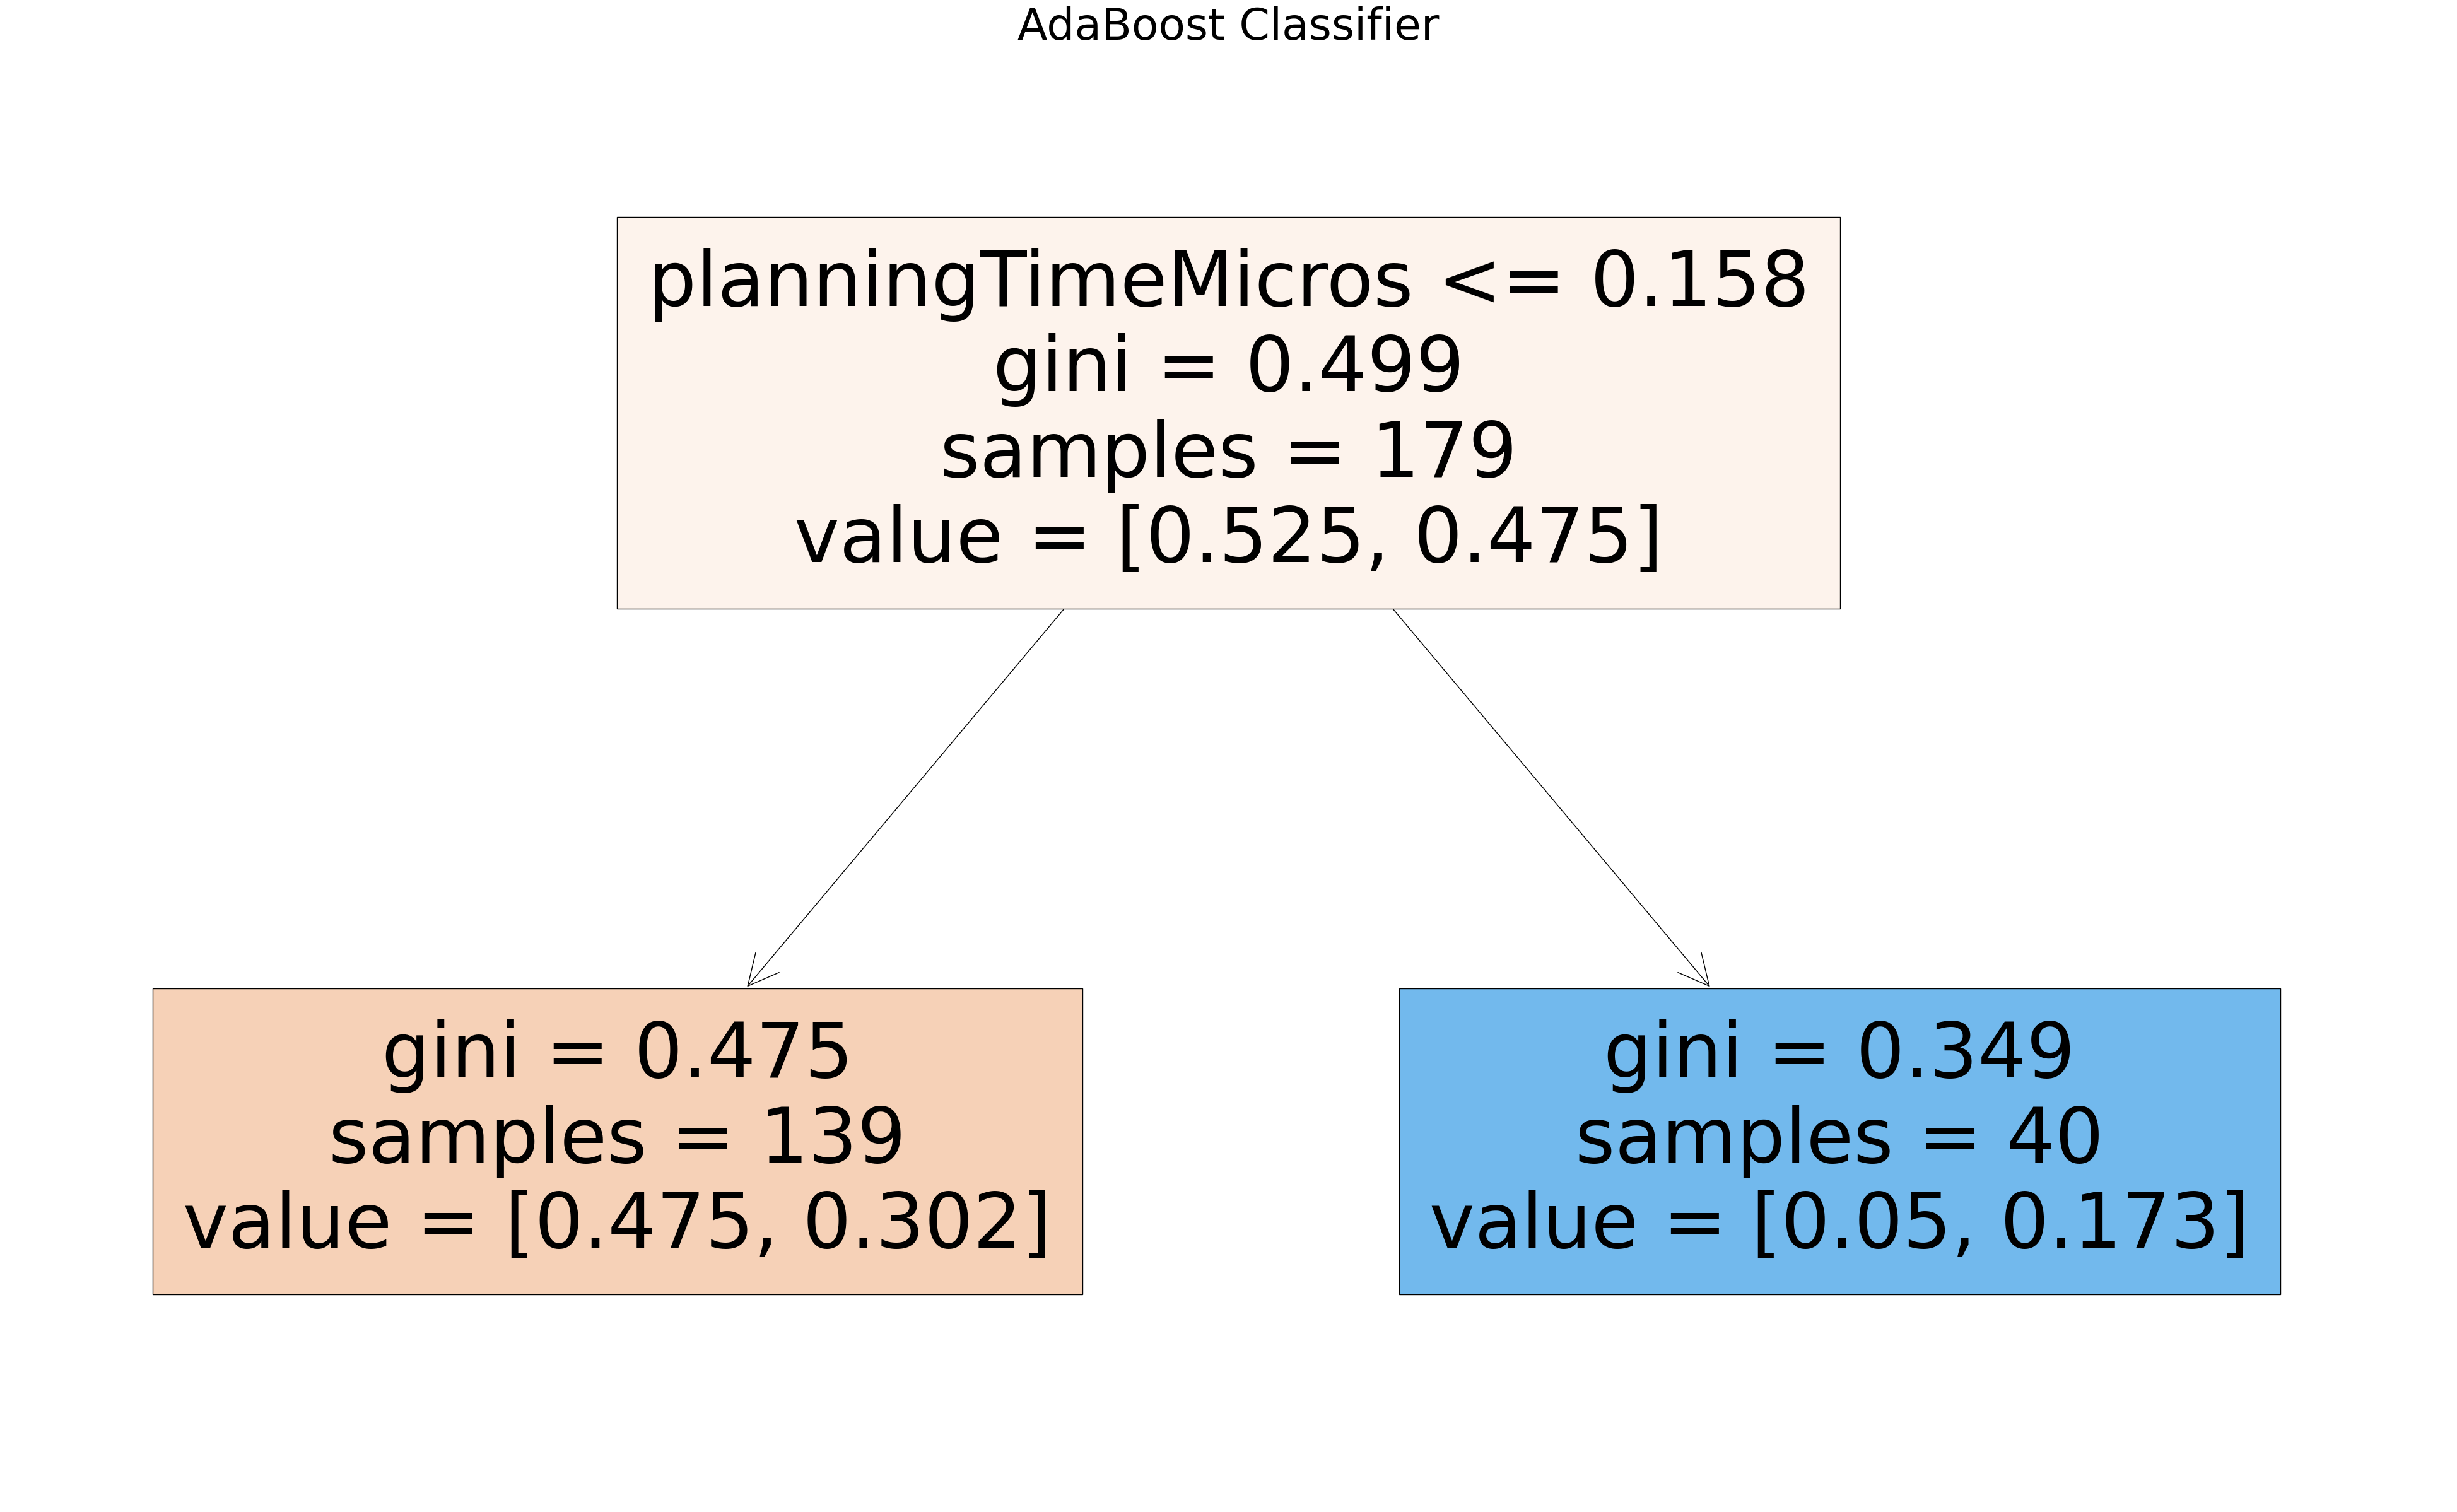

InvalidParameterError: The 'decision_tree' parameter of plot_tree must be an instance of 'sklearn.tree._classes.DecisionTreeClassifier' or an instance of 'sklearn.tree._classes.DecisionTreeRegressor'. Got array([DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                             random_state=RandomState(MT19937) at 0x7FCBF3F67240)],
      dtype=object) instead.

<Figure size 5000x3000 with 0 Axes>

In [15]:
plt.figure(figsize=(50, 30))
plot_tree(randF_A.estimators_[0], filled=True, feature_names=combined_feature_names)
plt.title('Random Forest', fontsize=50)
plt.show()

# Plot the second decision tree
plt.figure(figsize=(50, 30))
plot_tree(dt_clf, filled=True, feature_names=combined_feature_names)
plt.title('Decision Tree Classifier', fontsize=50)
plt.show()

# Plot the third decision tree
plt.figure(figsize=(50, 30))
plot_tree(bag_dt.estimators_[0], filled=True, feature_names=combined_feature_names)
plt.title('Bagging Classifier', fontsize=50)
plt.show()

# Plot the fourth decision tree
plt.figure(figsize=(50, 30))
plot_tree(ada_dt.estimators_[0], filled=True, feature_names=combined_feature_names)
plt.title('AdaBoost Classifier', fontsize=50)
plt.show()

plt.figure(figsize=(50, 30))
plot_tree(gbc_A.estimators_[0], filled=True, feature_names=combined_feature_names)
plt.title('AdaBoost Classifier', fontsize=50)
plt.show()